# Множественные субграфики

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## ``plt.axes``: создание субграфиков вручную

``plt.axes`` - простейший метод создания системы координат. Он принимает на входе необязательный аргумент, представляющий из себя список из четырех чисел, в системе координат рисунка ``[низ, левый угол, ширина, высота]``, отсчет начинается с 0
0 - левый нижний угол
1 - верхний правый угол

- ``низ`` - положение левого нижнего угла по горизонтале, в % от масштаба по горизонтале
- ``левый угол`` - положение левого нижнего угла по вертикале, в % от масштаба по вертикале
- ``ширина`` - ширина в % от масштаба
- ``высота`` - высота в % от масштаба

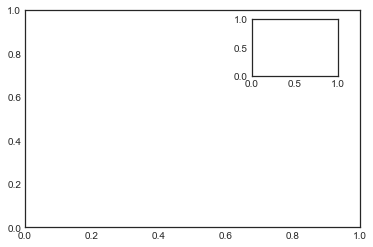

In [2]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

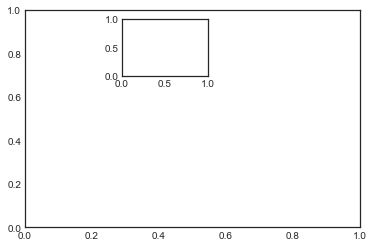

In [3]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.35, 0.65, 0.2, 0.2])

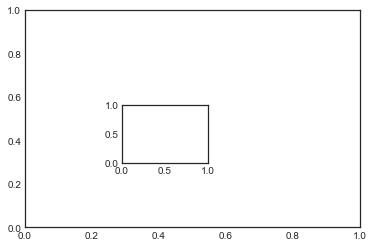

In [6]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.35, 0.35, 0.2, 0.2])

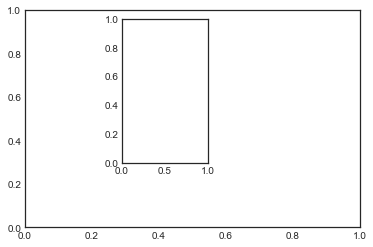

In [7]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.35, 0.35, 0.2, 0.5])

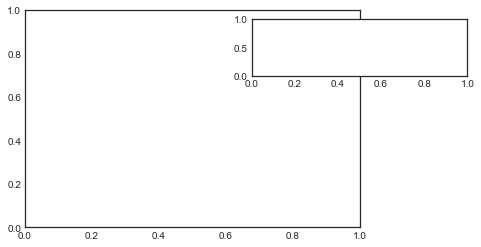

In [12]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.5, 0.2])

Аналог этой команды в объектно-ориентированном интерфейсе - ф-ия ``fig.add_axes()``

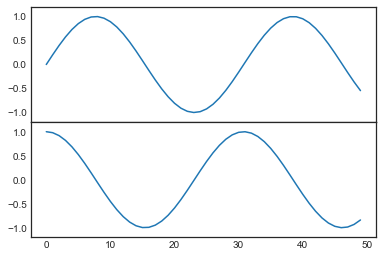

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[],
                   ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

## ``plt.subplot()`` : Простые сетки субграфиков

``plt.subplot()`` - создает отдельный субграфик внутри сетки. Принимает на входе 3 *аргумента*:
- *кол-во строк*
- *кол-во столбцов*
- *индекс графика* слева на право, снизу вверх

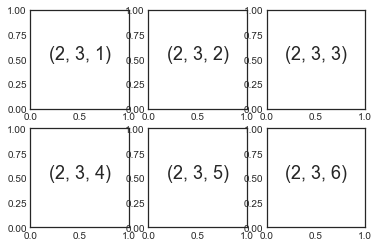

In [15]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18,
             ha='center'
            )

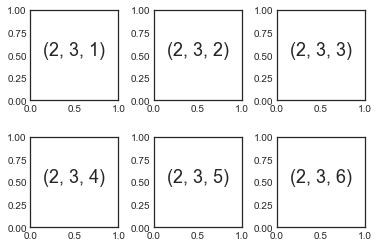

In [16]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # для настройки размеров hspace-высота, wspace-ширина
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) # объектно ориентир. эквивалент
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

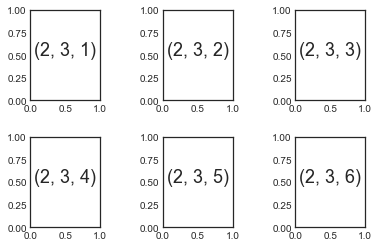

In [20]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.9) # для настройки размеров hspace-высота, wspace-ширина
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) # объектно ориентир. эквивалент
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

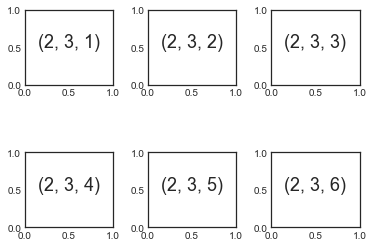

In [21]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.4) # для настройки размеров hspace-высота, wspace-ширина
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) # объектно ориентир. эквивалент
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## Ф-ия ``plt.subplots()``: создание всей сетки за один раз

``sharex='col'``, ``sharey='row'`` указание этих параметров автоматически убирате координатные сетки на отдельных графиках, и выравнивает их координатные сетки (связывает)

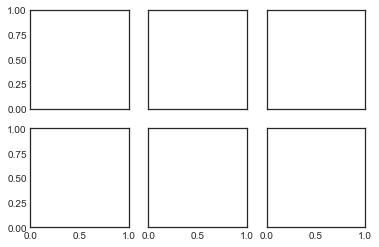

In [22]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

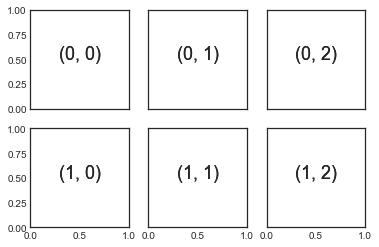

In [24]:
# можно ссылаться по индексам
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                     fontsize=18, ha='center')
fig

## Ф-ия ``plt.GridSpec``: более сложные конфигурации

При выходе за пределы обычной сетки графиков к субграфикам, имеющим разные размеры, наилучшим инструментом считается ``plt.GridSpec``.
``plt.GridSpec`` - не создает графиков, это удобный интерфейс

In [25]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

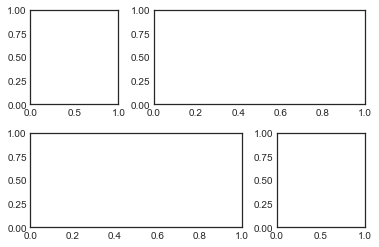

In [26]:
# теперь местоположение и размеры можно задать при помощи обычного синтаксиса срезов
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

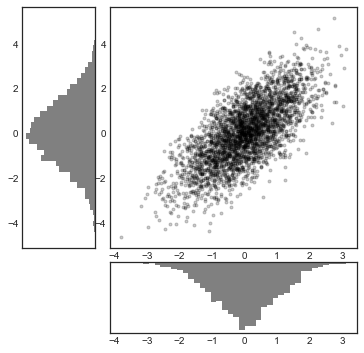

In [27]:
# Создаем норм распределенные данные
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Задаем систему координат
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Распределяем точки по основной системе координат
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Рисуем гистограммы на доп системах координат
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()